                                            IIT Bhilai
                                         Assignment 2 (SVM)
                                       Machine Learning CS550
                                         
          Group Member:
                Akash Singh            |     11640120           | EE
                Pintu Kumar            |     11640650           | EE
                Ravikant Kumar         |     11640770           | CSE
                Siddharth S Singh      |     11641000           | CSE

(Click to navigate to particular section)

## Overview:

- <a href='#1'>1. Import the libraries </a>
- <a href='#2'>2. Import the data </a>
- <a href='#3'>3. Visualising the Dataset </a>
- <a href='#4'>4. SVC Classifier </a>
    - <a href="#4_1">4.1 Training the model and determining accuracy </a>
    - <a href="#4_2">4.2 Number of updates 'k' required for convergence </a>
    - <a href="#4_3">4.3 Confusion Matrix </a>
    - <a href="#4_4">4.4 Classification Report </a>
    - <a href="#4_5">4.5 Determining the weights </a>
    - <a href="#4_6">4.6 Display of weights learned by Linear Marginal Classifier  </a>
    - <a href="#4_7">4.7 Determining the margin </a>

# <a id="1">1. Import the libraries  </a>

In [1]:
import numpy as np 
import pandas as pd
import time
import sys
import seaborn as sns # to plot graph
import matplotlib.pyplot as plt #to plot graph
from sklearn import preprocessing #to scale and do encoding
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC, SVC
import timeit

# <a id="2">2. Import  the data </a>

In [2]:
df_train = pd.read_csv('train.csv')
df_train = df_train.sample(frac=1).reset_index(drop=True)# shuffle
#display(df_train.head())
#print(df_train.shape)

df_test = pd.read_csv('test.csv')
df_test = df_test.sample(frac=1).reset_index(drop=True)# shuffle
#display(df_test.head())
#print(df_test.shape)

In [3]:
y_train = df_train['label'].values
X_train = df_train.drop(['label'], axis=1)
X_train.shape

(42000, 784)

In [4]:
# print(X_train)
y_test = df_test['7'].values
X_test = df_test.drop(['7'], axis=1)

# <a id="3">3. Visualizing  the data </a>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The data set, has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.


Let's now see how many columns are of type numerical, categorical and object type.

In [5]:
# measuring datatype count training data
dtype_data_tr =df_train.dtypes.reset_index()
dtype_data_tr.columns = ["Count", "Column Type"]
dtype_data_tr.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,785


In [6]:
# measuring datatype count test data
dtype_data_ts =df_test.dtypes.reset_index()
dtype_data_ts.columns = ["Count", "Column Type"]
dtype_data_ts.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,785


Text(0.5, 1.0, 'Count of each class in Training Data')

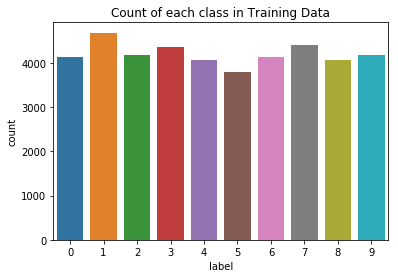

In [7]:
ax = sns.countplot(x="label", data=df_train)
ax.set_title('Count of each class in Training Data')

Text(0.5, 1.0, 'Count of each class in Test Data')

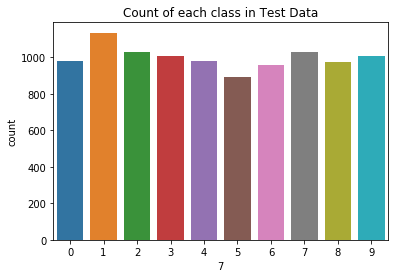

In [8]:
ax = sns.countplot(x="7", data=df_test)
ax.set_title('Count of each class in Test Data')

# <a id="4">4. SVC Classifier</a>

To speed up the training process the features must be scaled down, for that purpose we use Standard Scaler. The training is then done on the scaled dataset. 

<a id="4_1"><h2>4.1 Training the model and determining accuracy </h2></a>

In [9]:
start = time.time()
print("Creating Model.....")
clf_svc = SVC(kernel='linear', verbose=True, C=1.0)
print("Training.....")
clf_svc.fit(StandardScaler().fit_transform(X_train), y_train)
end = time.time()
print("Predicting.....")
y_pred_svc = clf_svc.predict(StandardScaler().fit_transform(X_test))
acc_svc = accuracy_score(y_test, y_pred_svc)
print("Linear SVC accuracy: ",acc_svc)
print("Training time: ",end-start)

Creating Model.....
Training.....
[LibSVM]Predicting.....
Linear SVC accuracy:  0.9657965796579658
Training time:  367.3387293815613


<a id="4_2"><h2>4.2 Number of updates 'k' required for convergence </h2></a>

To get the number of iterations/updates first we have to turn verbose = 'True' 
This results a total of 45 outputs each showing the number of iterations required for convergence of each Hyperplane.
The sum of the no. of iterations required for convergence of each Hyperplane gives the no.of updates/iterations k required for convergence of the SVM classifier.
(All the 45 outputs are given in the text file output.txt)

<a id="4_3"><h2>4.3 Confusion Matrix</h2></a>

Confusion matrix, without normalization
[[ 972    0    0    0    0    3    2    2    1    0]
 [   0 1131    1    0    1    0    0    0    2    0]
 [   4    4 1007    4    0    2    2    4    4    1]
 [   2    0   11  962    1   22    0    2    7    3]
 [   1    0    5    0  957    0    2    4    2   11]
 [   4    1    3   22    3  843    2    1   11    2]
 [   7    3    7    1    1   10  928    0    1    0]
 [   0    4   13    8    7    0    0  983    0   12]
 [   0    2    9   16    5   14    3    3  920    2]
 [   4    4    3    7   17    3    0   16    1  954]]
Normalized confusion matrix
[[9.92e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 3.06e-03 2.04e-03 2.04e-03
  1.02e-03 0.00e+00]
 [0.00e+00 9.96e-01 8.81e-04 0.00e+00 8.81e-04 0.00e+00 0.00e+00 0.00e+00
  1.76e-03 0.00e+00]
 [3.88e-03 3.88e-03 9.76e-01 3.88e-03 0.00e+00 1.94e-03 1.94e-03 3.88e-03
  3.88e-03 9.69e-04]
 [1.98e-03 0.00e+00 1.09e-02 9.52e-01 9.90e-04 2.18e-02 0.00e+00 1.98e-03
  6.93e-03 2.97e-03]
 [1.02e-03 0.00e+00 5

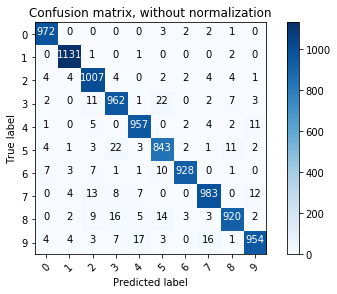

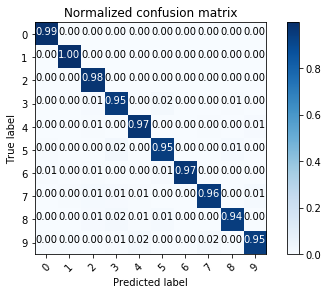

In [10]:
from sklearn.metrics import confusion_matrix
import itertools
class_names = ['0','1','2','3','4','5','6','7','8','9']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<a id="4_4"><h2>4.4 Classification Report</h2></a>

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.98      1.00      0.99      1135
          2       0.95      0.98      0.96      1032
          3       0.94      0.95      0.95      1010
          4       0.96      0.97      0.97       982
          5       0.94      0.95      0.94       892
          6       0.99      0.97      0.98       958
          7       0.97      0.96      0.96      1027
          8       0.97      0.94      0.96       974
          9       0.97      0.95      0.96      1009

avg / total       0.97      0.97      0.97      9999



<h2>Tuning the Model </h2>

In [12]:
# from sklearn.grid_search import GridSearchCV
# from time import time
# from operator import itemgetter

# def report(grid_scores, n_top=3):
#     top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
#     for i, score in enumerate(top_scores):
#         print("Model with rank: {0}".format(i + 1))
#         print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
#               score.mean_validation_score,
#               np.std(score.cv_validation_scores)))
#         print("Parameters: {0}\n".format(score.parameters))
 

# params = {
#     'C': (np.arange(0.001,1,0.1))
#             }

# model = SVC(kernel='linear')
# model_svm = GridSearchCV(model, param_grid=params)
# start = time()
# model_svm.fit(X_train, y_train)
# print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#       % (time() - start, len(model_svm.grid_scores_)))
# report(model_svm.grid_scores_)

In [13]:
# C = list((np.arange(0.001,1,0.1)))
# scores = []
# for c in C:
#     model = SVC(kernel='linear', C=c)
#     model.fit(X_train, y_train)
#     scores.append(model.score(X_test, y_test))

# plt.title("Effect of C")
# plt.xlabel("C")
# plt.ylabel("score")
# plt.plot(C, scores) 

In [14]:
# print("Best Score: {:.3f}".format(model_svm.best_score_))

In [15]:
# print(model_svm.best_params_)

In [16]:
# from sklearn.cross_validation import cross_val_score
# svc=SVC(kernel='linear',C=0.001)
# scores = cross_val_score(svc, X_train, , cv=10, scoring='accuracy') #cv is cross validation
# print(scores)

In [17]:
# y_pred= model_svm.predict(X_test)
# print(metrics.accuracy_score(y_pred,Y_test))

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy: {:.2f}".format(metrics.accuracy_score(Y_test, y_pred)))

<a id="4_5"><h2>4.5 Determining the weights </h2>

The weights obtained from clf.coef_ represent the vector coordinates which are orthogonal to the hyperplane and their direction indicates the predicted class

In [18]:
w = clf_svc.coef_
b = clf_svc.intercept_
print('w = ',w)
np.savetxt('weights.txt', w, delimiter=',', header = "Weight Matrix")
print('b = ',b)
print('Indices of support vectors = ', clf_svc.support_)
print('Support vectors = ', clf_svc.support_vectors_)
print('Number of support vectors for each class = ', clf_svc.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(clf_svc.dual_coef_))

w =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
b =  [  0.31  -2.23  -1.18  -0.41  -3.18  -0.93  -0.31  -1.92  -0.87  -3.57
  -3.89   0.23  -2.72  -0.8   -2.67 -10.02  -1.06  -0.33   1.24   0.3
   3.2    2.05  -1.51   0.76   1.83  -0.22   1.38   2.8   -0.67   2.48
  -1.08   0.7   -0.32  -2.27  -2.31   6.88   0.89  -0.88   0.37  -0.38
  -2.4   -0.67  -2.11  -3.04   2.91]
Indices of support vectors =  [   16    31    50 ... 41824 41923 41981]
Support vectors =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of support vectors for each class =  [ 428  363  845  965  708  930  529  709 1011  912]
Coefficients of the support vector in the decision function =  [[7.85e-04 0.00e+00 0.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00 ... 0.00e+00 0.00e

<a id="4_6"><h2>4.6 Display of weights learned by Linear Marginal Classifier </h2>

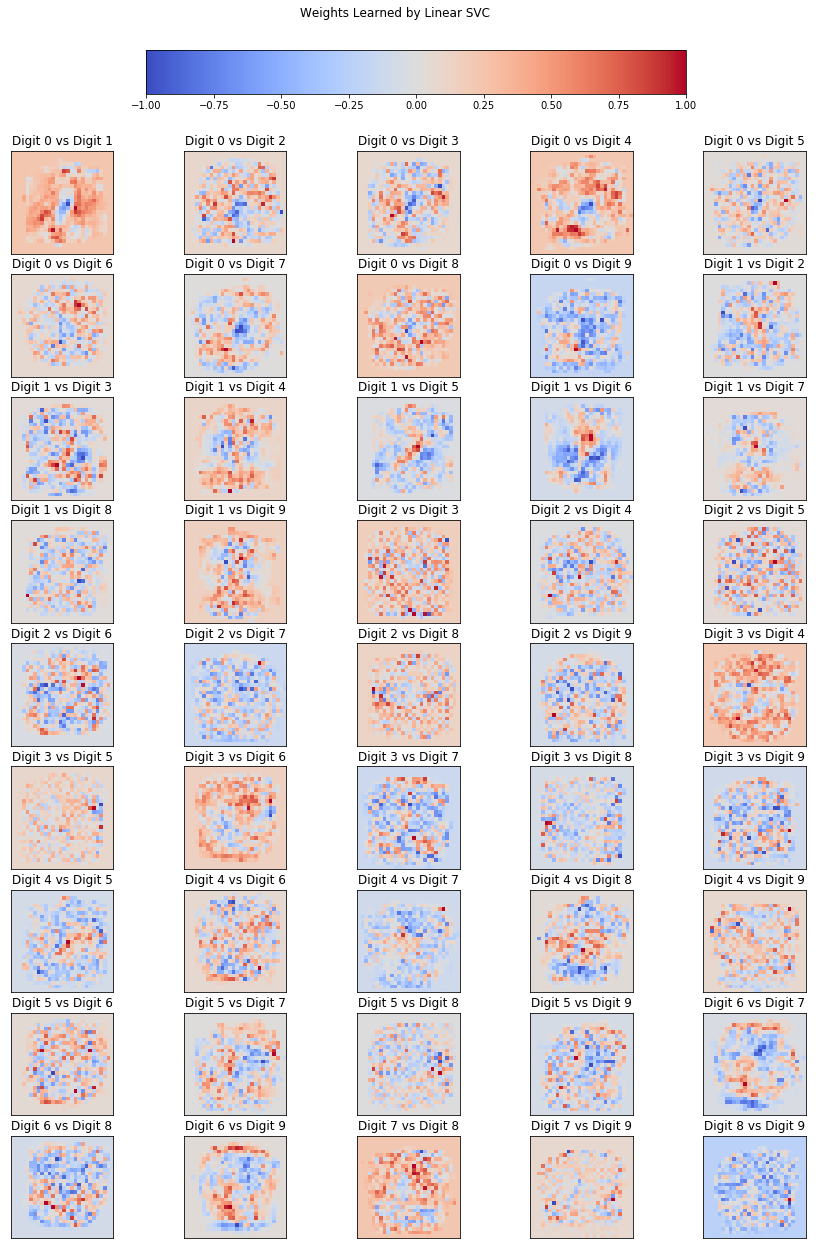

In [19]:
Weights = clf_svc.coef_ + clf_svc.intercept_[:, np.newaxis]

fig, axes = plt.subplots(9, 5, figsize=(15, 20))
plt.suptitle("Weights Learned by Linear SVC")
cax = fig.add_axes([0.27, 0.92, 0.5, 0.03])

i, j = 0, 1
for weight, ax in zip(Weights, axes.ravel()):
    weight = np.interp(weight, [np.min(weight), np.max(weight)], [-1, 1])
    im = ax.imshow(weight.reshape(28, 28), interpolation='nearest', cmap=plt.get_cmap('coolwarm'))
    ax.set_title("Digit {} vs Digit {}".format(i, j))
    ax.set_xticks(())
    ax.set_yticks(())
    j += 1
    if j>9:
        i += 1
        j = i+1

fig.colorbar(im, cax=cax, orientation='horizontal')
plt.savefig('Waights.png', bbox_inches='tight')
plt.show()

<a id="4_7"><h2>4.7 Determining the margin </h2>

In [20]:
from numpy import linalg as la
margin = 2.0/la.norm(w,axis=1)

In [21]:
print(margin)
np.savetxt('margins.txt', margin, delimiter=',', header = "Margin of the 45 classifiers")

[3.56 0.88 1.14 2.21 0.53 0.65 2.13 0.68 1.2  0.7  0.86 1.2  1.15 1.94
 0.8  0.26 1.02 0.21 0.45 0.3  0.45 0.36 0.2  0.58 1.15 0.26 1.36 0.52
 0.3  0.26 0.77 0.73 0.58 1.01 0.2  0.24 1.12 0.24 0.43 2.76 0.66 2.4
 0.75 0.26 0.24]
